# Описание проекта

Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами

## Содержание  


* [1.Описание данных и задач](#данные)
* [2.Импорт библиотек и изучение общей информации](#импорт)
    * [2.1 Датафрейм "Hypothesis" (информация о гипотезах по увеличению выручки интернет-магазина)](#гипотезы) 
    * [2.2 Датафрейм "Orders" (информация о заказах)](#заказы)
    * [2.3 Датафрейм "Visitors" (информация о пользователях)](#пользователи)
* [3.Приоритизация гипотез](#ГИП)
    * [3.1 Фреймворк ICE для приоритизации гипотез](#АЙС) 
    * [3.2 Фреймворк RICE для приоритизации гипотез](#РАЙС)
    * [3.3 Интерпретация результатов приоритизации гипотез методами ICE и RICE](#результат)
* [4.Построение графиков кумулятивных метрик](#кум)
    * [4.1 График куммулятивной выручки по группам](#кумвыр) 
    * [4.2 График куммулятивного среднего чека по группам](#кумчек)
    * [4.3 График относительного изменения куммулятивного среднего чека группы В к группе А](#кумчекотн)
    * [4.4 График куммулятивной конверсии по группам](#кумконв)
    * [4.5 График относительного изменения куммулятивной конверсии группы В к группе А](#кумконвотн)    
* [5.Анализ выбросов и всплесков](#аном)
    * [5.1 Точечный график количества заказов по пользователям](#аномпольз) 
    * [5.2 Граница числа заказов для определения аномальных пользователей](#апп)
    * [5.3 Точечный график стоимостей заказов](#аномст)
    * [5.4 Граница стоимостей заказов для определения аномальных заказов](#асп)
* [6.Анализ результатов A/B-теста](#абтест)
    * [6.1 Статистическая значимость различий в конверсии по "сырым" данным](#сзксд)
    * [6.2 Статистическая значимость различий в среднем чеке по "сырым" данным](#сзчсд)
    * [6.3 Очистка данных](#чист)    
    * [6.4 Графики относительных изменений куммулятивных метрик по "очищенным" данным](#год)       
    * [6.5 Статистическая значимость различий в конверсии по "очищенным" данным](#сзкод)
    * [6.6 Статистическая значимость различий в среднем чеке по "очищенным" данным](#сзчод)  
* [7.Вывод по результатам А/В-теста](#ВЫВОД)    

# 1. Описание данных <a name="данные"></a>  

### Файл **hypothesis**  

* **Hypothesis** — краткое описание гипотезы;  
* **Reach** — охват пользователей по 10-балльной шкале;  
* **Impact** — влияние на пользователей по 10-балльной шкале;  
* **Confidence** — уверенность в гипотезе по 10-балльной шкале;  
* **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

### Файл **orders**  

* **transactionId** — идентификатор заказа;  
* **visitorId** — идентификатор пользователя, совершившего заказ;  
* **date** — дата, когда был совершён заказ;  
* **revenue** — выручка заказа;  
* **group** — группа A/B-теста, в которую попал заказ.  

### Файл **visitors**  

* **date** — дата;  
* **group** — группа A/B-теста;  
* **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста  


## 2. Импорт библиотек и изучение общей информации <a name="импорт"></a>

In [1]:
# импортируем библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime as dt
import scipy.stats as stats


In [2]:
# сохраняем данные  в переменные hypothesis, orders, visitors
hypothesis = pd.read_csv('')
orders = pd.read_csv('')
visitors = pd.read_csv('')

Напишем функцию с помощью которой будем выводить информацию о датафреймах

In [3]:
def total_info(data, name):
    print(name)
    display(data.head(10))
    print('*************************************')
    display(data.info()) 
    print('*************************************')
    print("Число дубликатов:", data.duplicated().sum())
    print('*************************************')

Приступим к ознакомлению с данными.

**Датафрейм "Hypothesis" (информация о гипотезах по увеличению выручки интернет-магазина)**<a name="гипотезы"></a>

In [4]:
total_info(hypothesis, 'Информация о гипотезах по увеличению выручки интернет-магазина')

Информация о гипотезах по увеличению выручки интернет-магазина


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

*************************************
Число дубликатов: 0
*************************************


Здесь всё отлично, данные полные, пропусков и дубликатов нет  

Приведем названия столбцов к нижнему регистру

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()
# посмотрим на обновленный датафрейм
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


**Датафрейм "Orders" (информация о заказах)**<a name="заказы"></a>

In [6]:
total_info(orders, 'Информация о заказах')

Информация о заказах


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

*************************************
Число дубликатов: 0
*************************************


Данные полные, пропусков и дубликатов нет.   

Для дальнейшей работы приведем столбец содержащий даты 'date' к типу datetime (сейчас они имеют тип object) и переименуем колонки 'transactionId' и 'visitorId'

In [7]:
# приведем данные с датами к типу datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
# переименуем колонки
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [9]:
# посмотрим на обновленный датафрейм
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Датафрейм "Visitors" (информация о пользователях)**<a name="пользователи"></a>

In [10]:
total_info(visitors, 'Информация о пользователях')

Информация о пользователях


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

*************************************
Число дубликатов: 0
*************************************


Данные полные, пропусков и дубликатов нет.   

Для дальнейшей работы приведем столбец содержащий даты 'date' к типу datetime (сейчас они имеют тип object)

In [11]:
# приведем данные с датами к типу datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
# посмотрим на обновленный датафрейм
visitors.tail()

,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


**Вывод:** 
* данные полные, пропусков и дубликатов нет.

* у столбцов, содержащих даты изменили дип данных на datetime.     
* привели названия столбцов к единому формату.


## 3. Приоритизация гипотез <a name="ГИП"></a>

**Применим фреймворк ICE для приоритизации гипотез**<a name="АЙС"></a>

Посчитаем ICE для гипотез и добавим полученные значения ICE к существующей таблице.

In [13]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'])
hypothesis['ICE'] = hypothesis['ICE'].apply(lambda x: '{:.1f}'.format(x))
hypothesis['ICE'] = hypothesis['ICE'].astype('float')
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0


In [14]:
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False).style.bar(subset=['ICE'], vmin=0, width=100)\
.set_caption('Приоритизация гипотез с помощью фреймворка ICE')

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1


Наиболее перспективные гипотезы при приоритизации  способом ICE:  

* **гипотеза №8:** запустить акцию, дающую скидку на товар в день рождения  

* **гипотеза №0:** добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  

* **гипотеза №7:** добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  


**Применим фреймворк RICE для приоритизации гипотез**<a name="РАЙС"></a>

Посчитаем RICE для гипотез и добавим полученные значения RICE к таблице.

In [15]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(3)

In [16]:
hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False).style.bar(subset=['RICE'], vmin=0, width=100)\
.set_caption('Приоритизация гипотез с помощью фреймворка RICE')

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


Наиболее перспективные гипотезы при приоритизации  способом RICE:  

* **гипотеза №7:** добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  

* **гипотеза №2:** добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    
* **гипотеза №0:** добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей    

* **гипотеза №6:** показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  

**Интерпретируем результаты приоритизации гипотез методами ICE и RICE**<a name="результат"></a>

In [17]:
# присвоим гипотезам номера
hypothesis = hypothesis.reset_index()
hypothesis.columns = ['hypothesis_number', 'hypothesis', 'reach', 'impact', 'confidence', 'efforts', 'ICE',
       'RICE']

Создадим датафрейм hypothesis_ICE в котором будет содержаться информация о номере гипотезы, о значении ICE для этой гипотезы и о том насколько перспективна эта гипотеза при оценке способом ICE по шкале от 1 до 9 (ICE_points).

In [18]:
hypothesis_ICE = hypothesis.sort_values(by = 'ICE', ascending = True)
hypothesis_ICE.index = range(len(hypothesis))
hypothesis_ICE = hypothesis_ICE[['hypothesis_number', 'ICE']].reset_index()
hypothesis_ICE.columns = ['ICE_points', 'hypothesis_number', 'ICE']
hypothesis_ICE['ICE_points'] += 1
hypothesis_ICE.head()

,ICE_points,hypothesis_number,ICE
0,1,4,1.0
1,2,3,1.1
2,3,5,1.3
3,4,1,2.0
4,5,2,7.0


Создадим датафрейм hypothesis_RICE в котором будет содержаться информация о номере гипотезы, о значении RICE для этой гипотезы и о том насколько перспективна эта гипотеза при оценке способом RICE по шкале от 1 до 9(RICE_points).

In [19]:
hypothesis_RICE = hypothesis.sort_values(by = 'RICE', ascending = True)
hypothesis_RICE.index = range(len(hypothesis))
hypothesis_RICE = hypothesis_RICE[['hypothesis_number', 'RICE']].reset_index()
hypothesis_RICE.columns = ['RICE_points', 'hypothesis_number', 'RICE']
hypothesis_RICE['RICE_points'] += 1
hypothesis_RICE.head()

,RICE_points,hypothesis_number,RICE
0,1,4,3.0
1,2,1,4.0
2,3,5,4.0
3,4,3,9.0
4,5,8,16.2


Объединим hypothesis_ICE и hypothesis_RICE в df_total

In [20]:
df_total = hypothesis_ICE.merge(hypothesis_RICE, on='hypothesis_number').sort_values(by='RICE', ascending=False)
df_total = df_total[['hypothesis_number', 'ICE_points', 'RICE_points']]

Построим график, на котором отобразим насколько перспективны гипотезы при оценке способом ICE и RICE по шкале от 1 до 9 

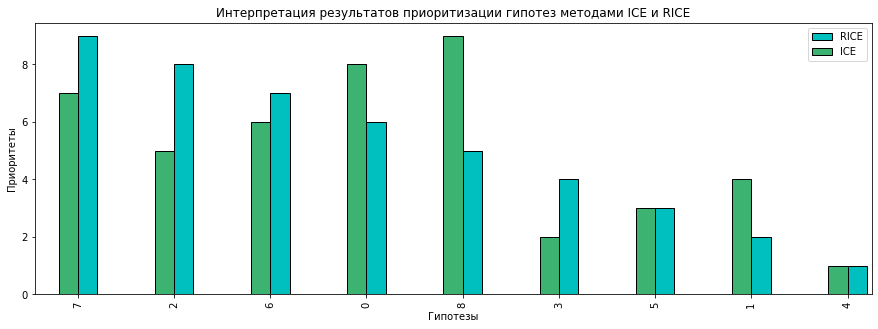

In [21]:
ax = plt.gca()

df_total.plot(x='hypothesis_number', y='RICE_points', kind='bar',figsize=(15,5), title = \
                              'Интерпретация результатов приоритизации гипотез методами ICE и RICE',\
              ax=ax, ec='black', width=0.2, position=0, color = 'c')
df_total.plot(x='hypothesis_number', y='ICE_points', kind='bar',ax=ax, ec='black',\
                                                               width=0.2, position=1, color = 'mediumseagreen')

ax.set_xlabel('Гипотезы')
ax.set_ylabel('Приоритеты')
plt.legend(['RICE', 'ICE']);

Параметр охвата (reach), использующийся в методе RICE изменил всю приоритетность, полученную по методу ICE:

* без учета охвата (метод ICE) на первом месте идет акция со скидкой имениннику гипотеза №8, но параметр reach=1 справедливо понизил приоритет этой акции, т.к. и правда, охват её минимальный (по сравнению с другими гипотезами увеличения выручки);

* выросли в рейтинге (стали более приоритетными) RICE (по сравнению с ICE): гипотеза №7 (reach=10)о добавлении формы подписки на все основные страницы ресурса и гипотеза №2 (reach=8) о добавлении блоков рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

**Вывод:**   
Так как при использовании фреймворка RICE учитывается охват изменений (это важная составляющая оценки гипотез) будем опираться на результаты этого метода приоритизации и выделим следующие гипотезы для увеличения выручки:    

* **гипотеза №7:** добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  

* **гипотеза №2:** добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    
* **гипотеза №0:** добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей    

* **гипотеза №6:** показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  



## 4. Построение графиков кумулятивных метрик <a name="кум"></a>

Проверим корректность разделения пользователей на группы, нет ли у нас пользователей, которые попали и в группу А и в группу В

In [22]:
print('Процент пользователей, которые попали в две группы: {:.2%}'.\
      format(orders.groupby('visitor_id')['group'].nunique().mean()-1))
print('Количество пользователей, которые попали в две группы:',\
      orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').shape[0])

Процент пользователей, которые попали в две группы: 5.63%
Количество пользователей, которые попали в две группы: 58


Можно предположить, что это какие-нибудь тестовые пользователи.   
Например, человек, который заводил тест, может сам себя перекинуть из одной группы в другую, чтобы убедиться, что все работает как надо, так как их менее 6% оставим их без изменений 
(преподаватель посоветовал их не удалять, но указать в выводах на этот факт)

**Построим график куммулятивной выручки по группам**<a name="кумвыр"></a>

Чтобы нагляднее увидеть разницу между группами, строят график относительного различия. Чтобы построить графики, нужно собрать кумулятивные данные. 

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков

In [24]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups\
.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
       .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, \
             'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [25]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.\
apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одной с понятными названиями столбцов

In [26]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [28]:
# напишем функцию для построения графиков куммулятивных метрик
def cum_plt(data_A, data_B, column, title, ylabel):
    plt.figure(figsize = (15, 6))
    plt.plot(data_A['date'], data_A[column], label='A')
    plt.plot(data_B['date'], data_B[column], label='B')
    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel(ylabel)
    plt.grid()
    plt.legend();

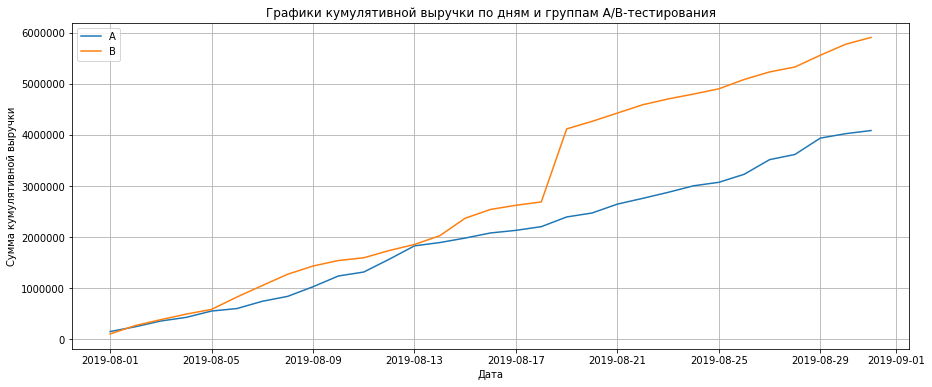

In [29]:
# строим график
cum_plt(cumulativeRevenueA, cumulativeRevenueB, 'revenue', 'Графики кумулятивной выручки по дням и группам A/B-тестирования',\
        'Сумма кумулятивной выручки')

Выручка по обоим группам почти равномерно увеличивается в течение всего теста.   
Показатели выручки группы В на протяжении всего теста выше, чем у группы А.   
Получается, что пользователи, группы B, приносят больше денег.  
График выручки группы В **2019-08-20** резко вырос.   
Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.


**Построим график куммулятивного среднего чека по группам**<a name="кумчек"></a>

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

In [30]:
cumulativeRevenueA['check'] = cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']
cumulativeRevenueB['check'] = cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']

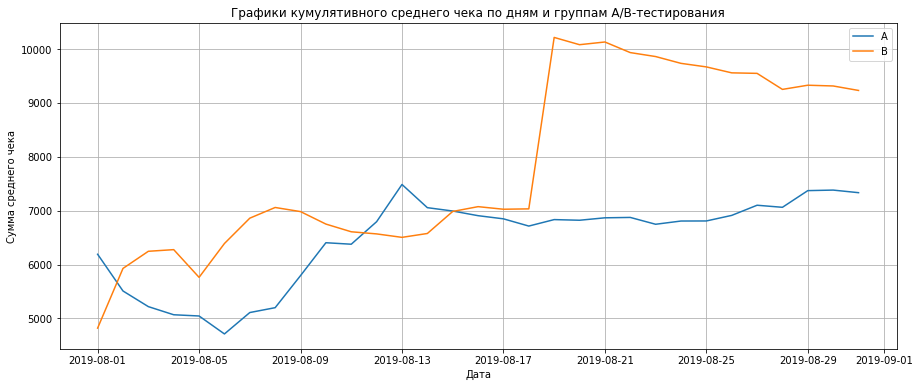

In [31]:
# строим график
cum_plt(cumulativeRevenueA, cumulativeRevenueB, 'check', \
        'Графики кумулятивного среднего чека по дням и группам A/B-тестирования'\
        ,'Сумма среднего чека')

Средний чек ближе к концу теста: немного растет для группы A и  постепенно падает для группы B (после резкого всплеска **2019-08-20**).   

Возможно, в группу B **2019-08-20** попал крупный заказ (резкий всплеск на графике), такой же всплеск мы наблюдали на графике куммулятивной выручки, за счет этого график среднего чека группы В лежит значительно выше графика группы А


**Построим график относительного изменения кумулятивного среднего чека группы В к группе А**<a name="кумчекотн"></a>

Построим график относительного различия для среднего чека. 

In [32]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.\
merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,checkA,revenueB,ordersB,checkB
0,2019-08-01,148579,24,6190.791667,101217,21,4819.857143
1,2019-08-02,242401,44,5509.113636,266748,45,5927.733333
2,2019-08-03,354874,68,5218.735294,380996,61,6245.836066
3,2019-08-04,425699,84,5067.845238,489567,78,6276.500000
4,2019-08-05,549917,109,5045.110092,581995,101,5762.326733


In [33]:
# напишем функцию для построения графиков относительных изменений
def relation_plot(data, columnA, columnB, title, ylable, y):
    plt.figure(figsize = (15, 6))
    plt.plot(data['date'],(data[columnB]/data[columnA]-1))
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axhline(y=y, color='black', linestyle='--')
    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel(ylable);

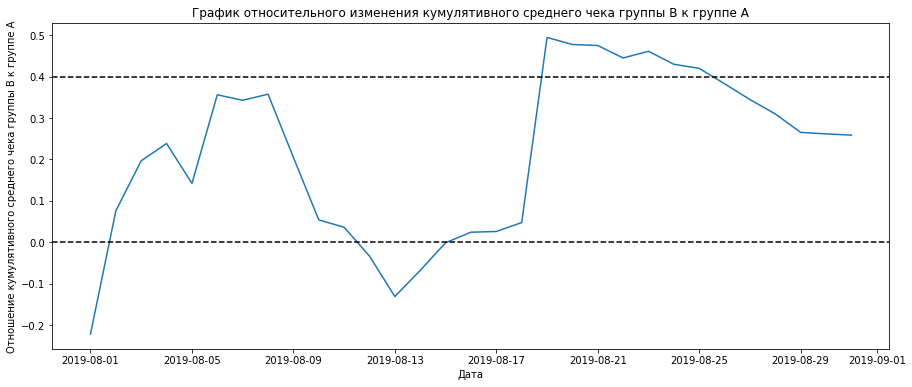

In [34]:
# строим график
relation_plot(mergedCumulativeRevenue, 'checkA', 'checkB', \
              'График относительного изменения кумулятивного среднего чека группы В к группе А',\
              'Отношение кумулятивного среднего чека группы В к группе А', 0.4)

В нескольких точках график различия между сегментами резко «скачет».  
Значит есть крупные заказы и выбросы.   
**2019-08-20** видим тот же всплеск, что и на предыдущих графиках.


**Построим график кумулятивной конверсии по группам**<a name="кумконв"></a>

In [35]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

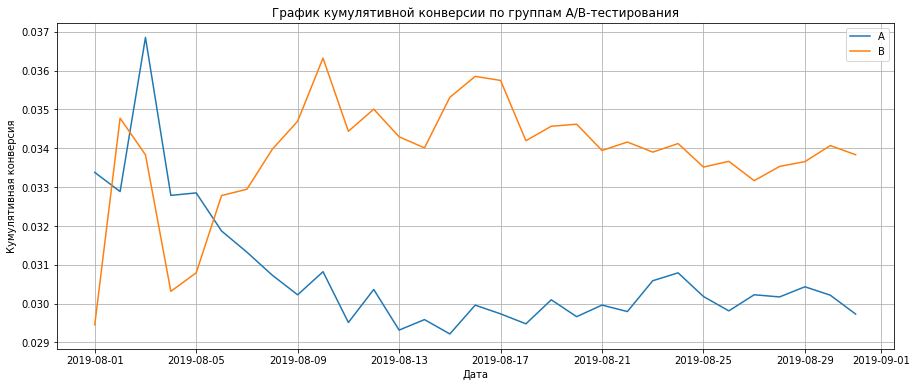

In [36]:
# строим график
cum_plt(cumulativeDataA, cumulativeDataB, 'conversion', 'График кумулятивной конверсии по группам A/B-тестирования',\
        'Кумулятивная конверсия')

Сначала группа А показывала более высокие значения конверсии, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

**Построим график относительного изменения кумулятивной конверсии группы В к группе А**<a name="кумконвотн"></a>

In [37]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


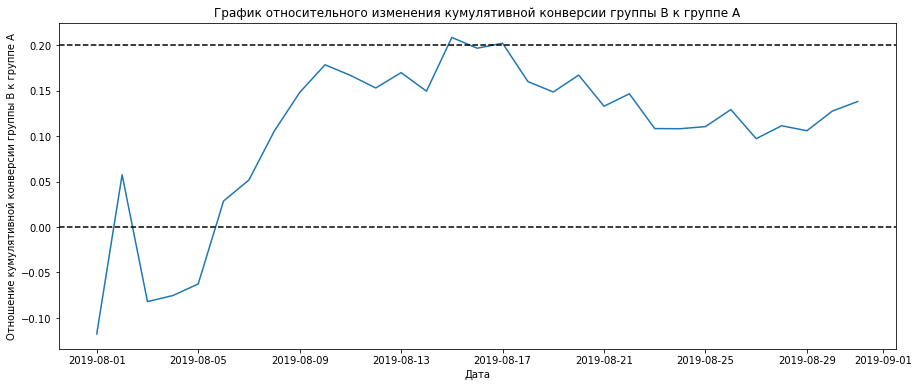

In [38]:
# строим график
relation_plot(mergedCumulativeConversions, 'conversionA', 'conversionB', \
              'График относительного изменения кумулятивной конверсии группы В к группе А',\
              'Отношение кумулятивной конверсии группы В к группе А', 0.2)

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд.   
Примерно с середины теста конверсия группа B начала снижаться, но к концу теста рост возобновился.  
Конверсия в группе B стабильно лучше конверсии в группе A на 10% по просшествии 1 недели после начала

**Вывод:**  по "сырым" данным можно сказать, что:  

* кумулятивная выручка группы В выше, чем у группы А
* кумулятивный средний чек группы В выше, чем у группы А
* конверсия группы В выше, чем конверсия группы А
* имеется аномальный всплеск данных в группе В - 20 августа 2019, необходимо исследовать данные на наличие аномалий


## 5.Анализ выбросов и всплесков<a name="аном"></a>

**Построим точечный график количества заказов по пользователям**<a name="аномпольз"></a>

Подсчитаем количество заказов по пользователям и посмотрим на результат

In [39]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False)\
.agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head()

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь  
Построим гистрограмму распределения количества заказов на одного пользователя.  

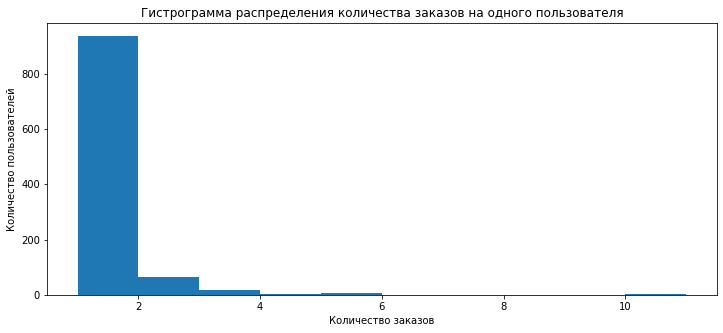

In [40]:
plt.figure(figsize = (12, 5))
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей');

Большинство покупателей заказывали только один раз.   
Однако доля пользователей с 2-4 заказами тоже значительна.  
Построим точечную диаграмму числа заказов на одного пользователя

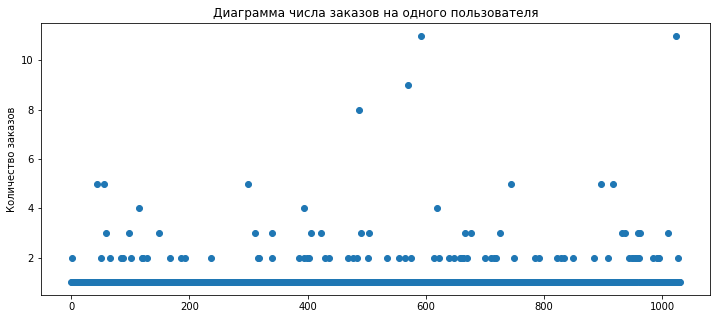

In [41]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize = (12, 5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Диаграмма числа заказов на одного пользователя')
plt.xlabel('')
plt.ylabel('Количество заказов');

Выводы подтверждаются: много пользователей с 2-4 заказами.   
Их точная доля не ясна — непонятно, считать их аномалиями или нет.  
Посчитаем выборочные перцентили количества заказов на одного пользователя  

**Найдем границу числа заказов для определения аномальных пользователей**<a name="апп"></a>

In [42]:
print('90-й перцентиль количества заказов на пользователя: %.0f' % (np.percentile(ordersByUsers['orders'], [90])))
print('95-й перцентиль количества заказов на пользователя: %.0f' % (np.percentile(ordersByUsers['orders'], [95])))
print('99-й перцентиль количества заказов на пользователя: %.0f' % (np.percentile(ordersByUsers['orders'], [99])))

90-й перцентиль количества заказов на пользователя: 1
95-й перцентиль количества заказов на пользователя: 2
99-й перцентиль количества заказов на пользователя: 4


Большая часть клиентов сделали по 1 заказу.  
95-й перцентиль равен 2 заказам, 99-й - 4 заказа.  
Не более 5% посетителей сделали больше чем 3 заказа и не более 1% - оформили 4 и больше заказов
Разумно выбрать 3 заказа на одного пользователя за границу числа заказов, и отсеять аномальных пользователей по ней. 


**Построим точечный график стоимостей заказов**<a name="аномст"></a>

Изучим гистограмму распределения стоимостей заказов

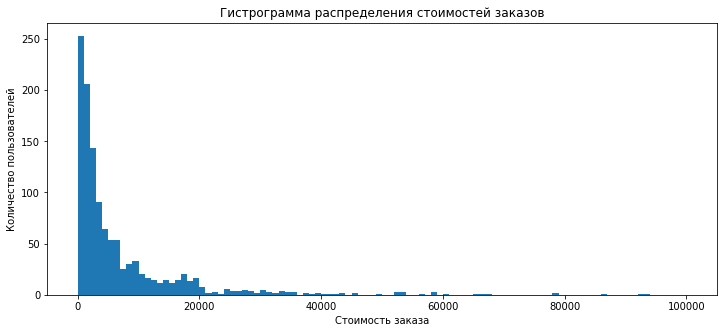

In [43]:
plt.figure(figsize = (12, 5))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения стоимостей заказов')
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество пользователей');

В данных явно есть заказы дороже 20 000 — например, около 80 000 и 90 000. 

Однако большинство всё-таки имеет выручку не более 20 000.  

Построим точечный график стоимостей заказов  

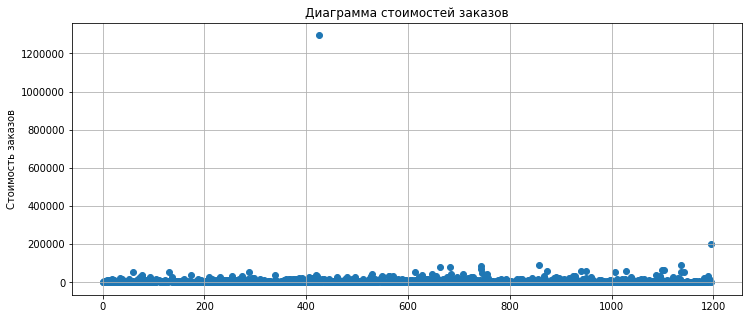

In [44]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (12, 5))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('Диаграмма стоимостей заказов')
plt.xlabel('')
plt.ylabel('Стоимость заказов');

На графике видим аномальный выброс около 1 250 000 (скорее всего это и есть тот заказ, который вызывал всплески на графиках кумулятивных метрик).   
Посмотрим на диаграмму поближе, ограничив стоимость заказа в 200 000   

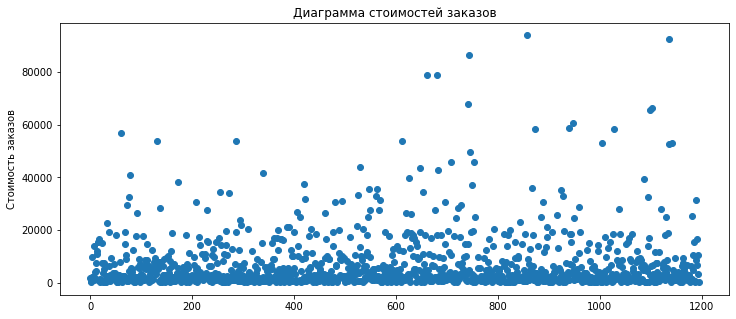

In [45]:
x_values = pd.Series(range(0,len(orders.query('revenue <= 200000')['revenue'])))
plt.figure(figsize = (12, 5))
plt.scatter(x_values, orders.query('revenue <= 200000')['revenue'])
plt.title('Диаграмма стоимостей заказов')
plt.xlabel('')
plt.ylabel('Стоимость заказов');

Большая часть заказов в пределах 40 000, заказов стоимостью более 60 000 совсем не много.  

Определим границу для определения аномальной стоимости заказов

**Найдем границу стоимостей заказов для определения аномальных заказов**<a name="асп"></a>

In [46]:
print('90-й перцентиль стоимостей заказов: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95-й перцентиль стоимостей заказов: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99-й перцентиль стоимостей заказов: %.2f' % (np.percentile(orders['revenue'], [99])))

90-й перцентиль стоимостей заказов: 18168.00
95-й перцентиль стоимостей заказов: 28000.00
99-й перцентиль стоимостей заказов: 58233.20


Большая часть заказов не более 20 000.  
5% заказов стоимостью более 28 000.  
1% заказов стоимостью более 58 000.  
Определим границу для аномальной стоимости заказов в размере 40 000.  

**Вывод:**  

* граница числа заказов для аномальных пользователей - 3 заказа.

* граница стоимостей заказоов для аномальных заказов - 40 000.


## 6. Анализ результатов A/B-теста <a name="абтест"></a>

**Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным**<a name="сзксд"></a>

Соберем датафрейм, который будет содержать информацию по каждой группе: количество заказов в выбранную дату, суммарное количество заказов до выбранной даты, выручка на выбранную дату, суммарная выручка до выбранной даты, количество пользователей в выбранную дату, суммарное количество пользователей до выбранной даты

In [47]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные в которых для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [48]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Создадим переменные в которых пользователям из разных групп будет соответствовать количество заказов

In [49]:
sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                               name='orders')],axis=0)

Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным с помощью критерия Манна-Уитни.  
Определим гиппотезы:  
* H0: статистически значимых различий в конверсии между группами нет  
* H1: статистически значимые различия в конверсии между группами есть  


In [50]:
alpha=0.05
p_value = (stats.mannwhitneyu(sampleA, sampleB)[1])
print("p-value={0:.5f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("Относительный прирост конверсии группы В: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())\
                       /(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value=0.00840
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы В: 0.138


Так как у нас p-value = 0.00840 меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, можем отвергнуть.   
**Прирост конверсии группы В на 13,8% статистическим значим**

**Посчитаем статистическую значимость различий в среднем чеке между группами по "сырым" данным**<a name="сзчсд"></a>

Посчитаем статистическую значимость различий в среднем чеке между группами по "сырым" данным с помощью критерия Манна-Уитни.  
Определим гиппотезы:  
* H0: статистически значимых различий в среднем чеке между группами нет
* H1: статистически значимые различия в среднем чеке между группами есть

In [51]:
alpha=0.05
p_value = (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print("p-value={0:.5f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print("Относительный прирост среднего чека группы В: {0:.3f}".\
      format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value=0.36465
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы В: 0.259


Так как у нас p-value = 0.36465 больше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не можем отвергнуть.   
**Прирост среднего чека группы В на 25,9% НЕ ЯВЛЯЕТСЯ статистическим значимым**

**Очистим данные**<a name="сзчсд"></a>

Выше мы приняли за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 40 000 рублей.   
Посмотрим как изменятся показатели теста после удаления аномальных пользователей  
Сделаем срезы пользователей с числом заказов больше 3 и пользователей, совершивших заказы дороже 40 000   
Объединим их в таблице 

In [52]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], \
                                 ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

**Посмотрим на графики относительных изменений куммулятивных метрик на "очищенных" данных**<a name="год"></a>

In [53]:
# создадим список аномальных пользователей и исключим их из таблицы orders
abnormalUsers_list = abnormalUsers.tolist()
orders_filt = orders.query('visitor_id not in @abnormalUsers_list')

По аналогии с графиками по "сырым" результатам соберём кумулятивные данные по "очищенным" результатам.

In [54]:
datesGroups_filt = orders_filt[['date','group']].drop_duplicates()
ordersAggregated_filt = datesGroups_filt.apply(lambda x: orders_filt[np.logical_and(orders_filt['date'] <= x['date'], \
                        orders_filt['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', \
                       'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).\
                        sort_values(by=['date','group'])
visitorsAggregated_filt = datesGroups_filt.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                          visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),\
                                                 axis=1).sort_values(by=['date','group'])
cumulativeData_filt = ordersAggregated_filt.merge(visitorsAggregated_filt, left_on=['date', 'group'], \
                                                  right_on=['date', 'group'])
cumulativeData_filt.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeRevenueA_filt = cumulativeData_filt[cumulativeData_filt['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_filt = cumulativeData_filt[cumulativeData_filt['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueA_filt['check'] = cumulativeRevenueA_filt['revenue']/cumulativeRevenueA_filt['orders']
cumulativeRevenueB_filt['check'] = cumulativeRevenueB_filt['revenue']/cumulativeRevenueB_filt['orders']
mergedCumulativeRevenue_filt = cumulativeRevenueA_filt.\
merge(cumulativeRevenueB_filt, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
cumulativeData_filt['conversion'] = cumulativeData_filt['orders']/cumulativeData_filt['visitors']
cumulativeDataA_filt = cumulativeData_filt[cumulativeData_filt['group']=='A']
cumulativeDataB_filt = cumulativeData_filt[cumulativeData_filt['group']=='B']
mergedCumulativeConversions_filt = cumulativeDataA_filt[['date','conversion']]\
.merge(cumulativeDataB_filt[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

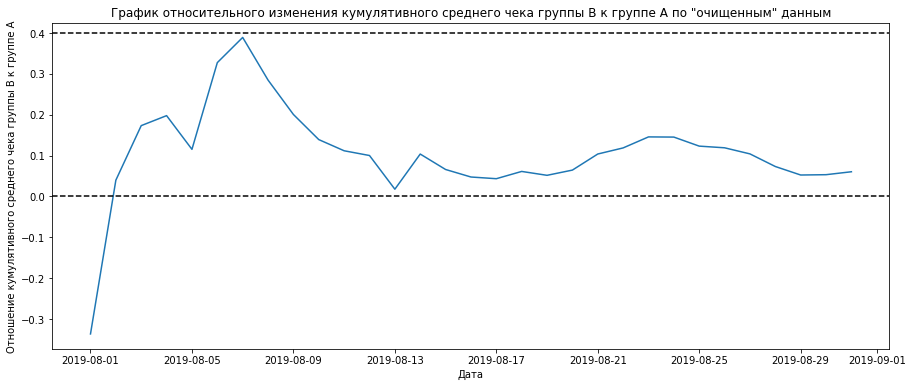

In [55]:
# строим график относительного изменения среднего чека по фильтрованным данным
relation_plot(mergedCumulativeRevenue_filt, 'checkA', 'checkB',\
              'График относительного изменения кумулятивного среднего чека группы В к группе А по "очищенным" данным',\
              'Отношение кумулятивного среднего чека группы В к группе А', 0.4)

По "очищенным" данным видим следующую картину: в первую неделю относительное изменение среднего чека группы В к группе А уверенно растёт, потом небольшое падение и стабилизация около 7-10% в конце теста 

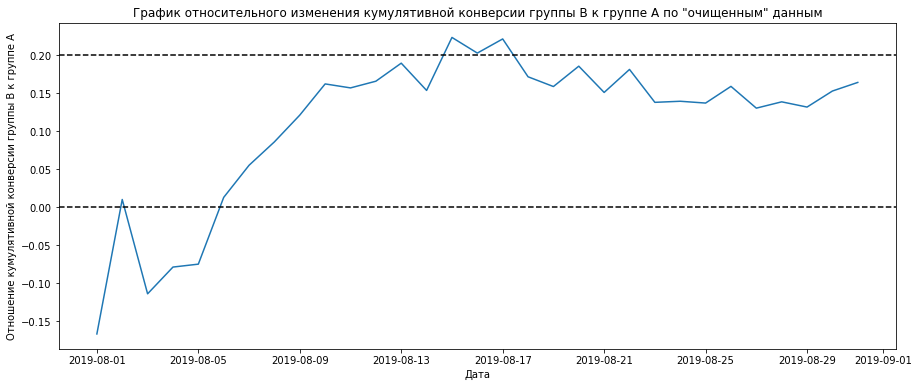

In [56]:
# строим график относительного изменения конверсии по фильтрованным данным
relation_plot(mergedCumulativeConversions_filt, 'conversionA', 'conversionB', \
              'График относительного изменения кумулятивной конверсии группы В к группе А по "очищенным" данным',\
              'Отношение кумулятивной конверсии группы В к группе А', 0.2)

Относительное изменение конверсии группы В к группе А по "очищенным" данным показывает уверенный рост с первой недели проведения теста, к концу недели она стабилизировалась в районе 15 - 16 %


**Посчитаем статистическую значимость различий в конверсии между группами по "очищенным" данным**<a name="сзкод"></a>

Подготовим выборки количества заказов по пользователям по группам теста

In [57]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                                       name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам

Посчитаем статистическую значимость различий в конверсии между группами по "очищенным" данным.  
Определим гиппотезы:  
* H0: статистически значимых различий в конверсии между группами нет  
* H1: статистически значимые различия в конверсии между группами есть  

In [58]:
alpha=0.05
p_value = (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
print("p-value={0:.5f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("Относительный прирост конверсии группы В: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value=0.00465
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы В: 0.164


Так как у нас p-value = 0.00465 меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, можем отвергнуть.  
После "очистки" данных, прирост конверсии увеличился на 2,6 %  
**Прирост конверсии группы В на 16,4% статистическим значим**

**Посчитаем статистическую значимость различий в среднем чеке между группами по "очищенным" данным**<a name="сзчод"></a>

Посчитаем статистическую значимость различий в среднем чеке между группами по "очищенным" данным с помощью статистического критерия Манна-Уитни.  
Определим гиппотезы:  
* H0: статистически значимых различий в среднем чеке между группами нет
* H1: статистически значимые различия в среднем чеке между группами есть

In [59]:
alpha=0.05
p_value = (stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',\
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],\
                    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].\
                                        isin(abnormalUsers)))]['revenue'])[1])
print("p-value={0:.5f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print("Относительный прирост среднего чека группы В: {0:.3f}".\
      format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id']\
                    .isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A',\
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value=0.35549
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы В: 0.060


Так как у нас p-value = 0.35549 больше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не можем отвергнуть.   
После очистки данных мы увидели реальную картину, что прирост среднего чека совсем не большой, всего 6% (прирост среднего чека по "сырым" данным был почти 26%).  
Выбросы значительно искажали картину.  
**Прирост среднего чека группы В на 6 % НЕ ЯВЛЯЕТСЯ статистическим значимым**  


**Вывод:**

* прирост конверсии группы В относительно группы А статистически значим до и после очистки данных  

* прирост среднего чека группы В относительно группы А не является статистически значимым ни до, ни после очистки данных

## 7. Вывод по результатам А/В-теста <a name="ВЫВОД"></a>

Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B.     

Были сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей.   

Сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна, но это не даёт повода сомневаться в проведении теста и его результатах.   

Показатель конверсии в группе B больше показателя в группе A:  

* на 13.8 % до очистки данных  
* на 16.4 % после очистки данных.     

Данная разница показателей конверсии между группами и до, и после очистки данных является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, что пользволяет сделать вывод о том, что **можно остановить A/B-тест и зафиксировать ПОБЕДУ группы B**.  

Стоит отметить, что процессе работы с данными было выяснено, что некоторые пользователи попали в обе группы (А и В), что нарушает один из основных принцип работы A/B-теста - один пользователь попадает только в одну группу на всём протяжении теста.  
В связи с этим, необходимо проверить корректность отработки метода разделения пользователей и поправить его, чтобы один пользователь попадал только в одну группу.
